# DS_7331 Machine Learning - Lab 1 - Group 4

### Paticia Attah
### Linda Eliasen
### Senthil Kumar

### BUSINESS UNDERSTANDING

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.







xxxxx

### DATA MEANING  & TYPE

LINDA - overview of dataset



Original 2017 Data File:  https://www.dol.gov/agencies/eta/foreign-labor/performance

FIELD NAME	DESCRIPTION	
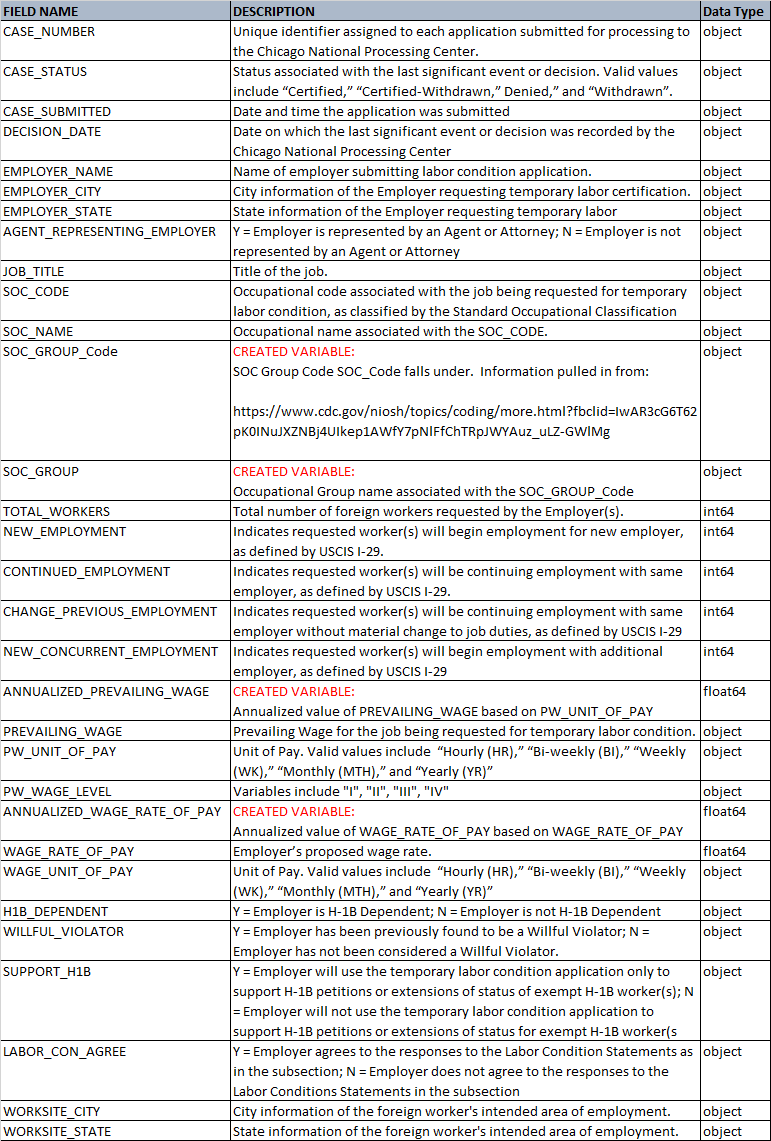

In [20]:
import pandas as pd 
import numpy as np
import plotly as py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('H-1B_Data_FY17.csv')

df.head(3)

C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,...,PW_WAGE_LEVEL,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_STATE
0,I-200-17075-764873,CERTIFIED,3/16/2017,3/22/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,NaN,ANCHORAGE,AK
1,I-200-17083-576785,CERTIFIED,3/24/2017,3/30/2017,BTY DENTAL GROUP LLC,ANCHORAGE,AK,Y,DENTIST,29-1021,...,Level II,165609.6,79.62,Hour,N,N,NaN,N,ANCHORAGE,AK
2,I-200-17160-672299,CERTIFIED-WITHDRAWN,6/13/2017,7/26/2017,"HALLIBURTON ENERGY SERVICES, INC.",HOUSTON,TX,Y,GENERAL FIELD PROFESSIONAL - DIRECTIONAL DRILLING,17-2171,...,Level II,172800.0,172800.00,Year,N,N,NaN,NaN,PRUDHOE BAY,AK


In [ ]:
Data Manipulation

In [8]:
# NEW COLUMN "CERTIFIED" combines certified & certified-withdrawn. 
# Both indicate the LCA Petition was approved.  Employer withdrew petition after certification.

df['CERTIFIED'] = np.where(df['CASE_STATUS']!='DENIED', 'Y','N')

In [7]:
# NEW COLUMN "PAY_ABOVE_PREV_WAGE" to calculate if wage rate is greater than or equal to prevailing wage
# Condition of certification process

df['PAY_ABOVE_PREV_WAGE'] = np.where(df['ANNUALIZED_WAGE_RATE_OF_PAY']>=df['ANNUALIZED_PREVAILING_WAGE'], '1', '0')

pay_compare = df.get(['ANNUALIZED_WAGE_RATE_OF_PAY', 'ANNUALIZED_PREVAILING_WAGE', 'PAY_ABOVE_PREV_WAGE'])
pay_compare.head(5)

pay_compare_totals_df = df.groupby(['PW_WAGE_LEVEL', 'PAY_ABOVE_PREV_WAGE']).size().reset_index(name='counts')



In [ ]:
# NEW COLUMN "DAYS_PROCESS"





In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575591 entries, 0 to 575590
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_NUMBER                  575591 non-null  object 
 1   CASE_STATUS                  575591 non-null  object 
 2   CASE_SUBMITTED               575591 non-null  object 
 3   DECISION_DATE                575591 non-null  object 
 4   EMPLOYER_NAME                575552 non-null  object 
 5   EMPLOYER_CITY                575591 non-null  object 
 6   EMPLOYER_STATE               575577 non-null  object 
 7   AGENT_REPRESENTING_EMPLOYER  488476 non-null  object 
 8   JOB_TITLE                    575589 non-null  object 
 9   SOC_CODE                     575591 non-null  object 
 10  SOC_NAME                     575590 non-null  object 
 11  SOC_GROUP_Code               575591 non-null  object 
 12  SOC_GROUP                    575585 non-null  object 
 13 

### DATA QUALITY

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

LINDA - EXCEL

In [ ]:
PATRCIA - PYTHON PORTION

### SIMPLE STATISTICS

In [10]:
#Subset of count variables for summary statistics chart  ERROR UNTIL DAYS_PROCESS IS ADDED ABOVE

dfssc = pd.DataFrame([df.TOTAL_WORKERS, df.NEW_EMPLOYMENT, df.CONTINUED_EMPLOYMENT, df.DAYS_PROCESS]).transpose()
dfssc.describe()

AttributeError: 'DataFrame' object has no attribute 'DAYS_PROCESS'

LINDA Discuss Above


In [21]:
#Subset of wage variables for summary statistics chart
dfssw = pd.DataFrame([df.ANNUALIZED_WAGE_RATE_OF_PAY, df.ANNUALIZED_PREVAILING_WAGE]).transpose()

,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
0,165609.60,165609.60
1,165609.60,165609.60
2,172800.00,152714.00
3,205300.00,150405.00
4,214000.00,143187.00
5,141969.06,141969.06
6,150280.00,137966.00
7,141960.00,134326.00
8,132350.00,132350.00
9,172800.00,130770.00


In [24]:
#NOT EORKING TO REMOVE 0's

# Removing rows with prevailing wage of 0 to improve accuracy of the summary statistics
#dfssw =dfssw[dfssw['ANNUALIZED_PREVAILING_WAGE'] !=0]
#dfssw.drop(dfssw.loc[dfssw['ANNUALIZED_PREVAILING_WAGE']==0].index, inplace=True)

dfssw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575591 entries, 0 to 575590
Data columns (total 2 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ANNUALIZED_WAGE_RATE_OF_PAY  575591 non-null  float64
 1   ANNUALIZED_PREVAILING_WAGE   575591 non-null  float64
dtypes: float64(2)
memory usage: 29.3 MB


In [25]:
dfssw.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ANNUALIZED_WAGE_RATE_OF_PAY,ANNUALIZED_PREVAILING_WAGE
count,575591,575591
mean,93184.4,77212.2
std,41287.3,26615.1
min,0,12000
25%,66726,59859
50%,83000,71822
75%,109990,90189
max,2.5e+06,868400


Linda - Discuss Above

### VISUALIZE ATTRIBUTES

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. 
Explain for each attribute why the chosen visualization is appropriate.

### EXPLORE JOINT ATTRIBUTES
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


### EXPLORE ATTRIBUTES & CLASS
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).


### NEW FEATURES
Are there other features that could be added to the data or created from existing features? Which ones?

LINDA

### EXCEPTIONAL WORK

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.